In [29]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support


In [30]:
data = pd.read_csv('dataset1.csv')

data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['content'] = data['content'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [31]:
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


In [32]:
'''Encoding output labels Anger = 0, Fear = 1, Joy = 2, Sadness = 3'''
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)

X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.3, shuffle=True)


tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

naive bayes tfidf accuracy 0.2656030032848428
precision_recall_fscore:
(0.2852352919915018, 0.2656030032848428, 0.2729462791107567, None)


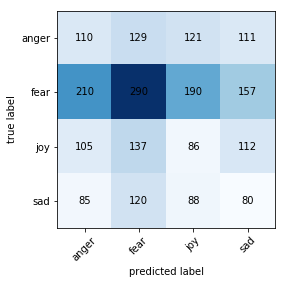

[[110 129 121 111]
 [210 290 190 157]
 [105 137  86 112]
 [ 85 120  88  80]]


In [33]:
# Building models using TFIDF vectors feature
#Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
#naive bayes tfidf accuracy 0.2869198312236287
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#naivebayes tfidf precision-0.2996580210076804,recall-0.2869198312236287,fscore-0.2919729742727401

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('nayeb_bayes_tfidf.tif')
plt.show()
print(cm)




svm using tfidf accuracy 0.25480994838104176
precision_recall_fscore:
(0.2775159491889917, 0.25480994838104176, 0.2631226593260271, None)


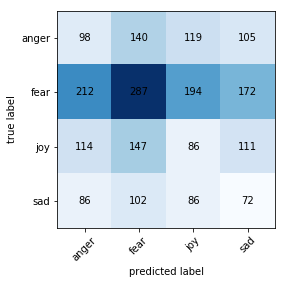

[[ 98 140 119 105]
 [212 287 194 172]
 [114 147  86 111]
 [ 86 102  86  72]]


In [34]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# svm tfidf accuracy 0.2770745428973277
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#svm tfidf precision-0.3061527810392982, recall-0.2770745428973277,fscore-0.28915029800304154

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('lsvm_tfidf.tif')
plt.show()
print(cm)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


log reg tfidf accuracy 0.2674800563115908
precision_recall_fscore:
(0.3085363883114397, 0.2674800563115908, 0.28147317032365154, None)


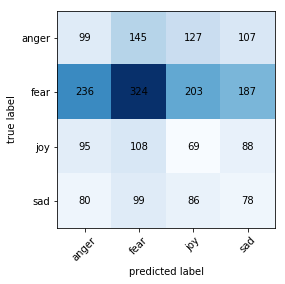

[[ 99 145 127 107]
 [236 324 203 187]
 [ 95 108  69  88]
 [ 80  99  86  78]]


In [35]:
# Model 3: logistic regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# log reg tfidf accuracy 0.27566807313642755
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#logreg tfidf precision-0.30861017072539093,recall-0.27566807313642755,fscore-0.2889020454583841

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('logistic_tfidf.tif')
plt.show()
print(cm)


random forest tfidf accuracy 0.2763960581886438
precision_recall_fscore:
(0.3130931338631253, 0.2763960581886438, 0.2889435518886856, None)


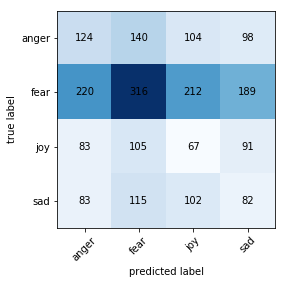

[[124 140 104  98]
 [220 316 212 189]
 [ 83 105  67  91]
 [ 83 115 102  82]]


In [36]:


# Model 4: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
print('random forest tfidf accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# random forest tfidf accuracy 0.26441631504922647
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#randforest tfidf precision-0.2865047392561802,recall-0.26441631504922647,fscore-0.2726382274300583

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('rf_tfidf.tif')
plt.show()
print(cm)


##Count

naive bayes count vectors accuracy 0.8259033317691225
precision_recall_fscore:
(0.826523746364226, 0.8259033317691225, 0.8260778094458278, None)


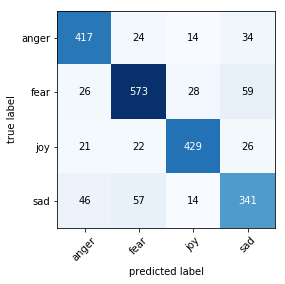

[[417  24  14  34]
 [ 26 573  28  59]
 [ 21  22 429  26]
 [ 46  57  14 341]]


In [37]:
## Building models using count vectors feature
# Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
print('naive bayes count vectors accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# naive bayes count vectors accuracy 0.8354430379746836
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#naivebayes countvector precision-0.834875740481212,recall-0.8354430379746836,fscore-0.8347510309179795

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('naive_bayes_count.tif')
plt.show()
print(cm)



lsvm using count vectors accuracy 0.8798686062881277
precision_recall_fscore:
(0.8816453899918241, 0.8798686062881277, 0.8799275508169241, None)


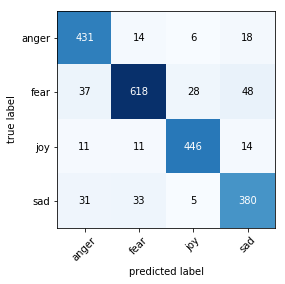

[[431  14   6  18]
 [ 37 618  28  48]
 [ 11  11 446  14]
 [ 31  33   5 380]]


In [38]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('lsvm using count vectors accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# lsvm using count vectors accuracy 0.8748241912798875
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#lsvm countvector precision-0.8779688711069533,recall-0.8748241912798875,fscore-0.8754180607537961

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('lsvm_count.tif')
plt.show()
print(cm)


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


log reg count vectors accuracy 0.8751759737212577
precision_recall_fscore:
(0.8771182726846206, 0.8751759737212577, 0.8753077420240559, None)


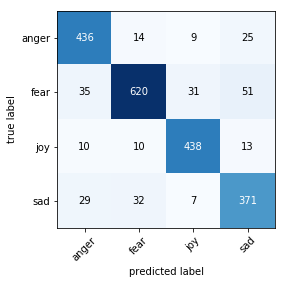

[[436  14   9  25]
 [ 35 620  31  51]
 [ 10  10 438  13]
 [ 29  32   7 371]]


In [39]:
# Model 3: Logistic Regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('log reg count vectors accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# log reg count vectors accuracy 0.8649789029535865
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#logreg countvector precision-0.8700387441437054,recall-0.8649789029535865,fscore-0.8660087718260978

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('logistic_count.tif')
plt.show()
print(cm)


random forest with count vectors accuracy 0.8526513374002815
precision_recall_fscore:
(0.859504049888681, 0.8526513374002815, 0.8524125146993135, None)


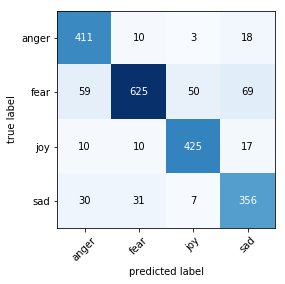

[[411  10   3  18]
 [ 59 625  50  69]
 [ 10  10 425  17]
 [ 30  31   7 356]]


In [40]:
# Model 4: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
print('random forest with count vectors accuracy %s\nprecision_recall_fscore:' % accuracy_score(y_pred, y_val))
# random forest with count vectors accuracy 0.8509142053445851
print(precision_recall_fscore_support(y_pred, y_val,average='weighted'))
#randforest countvector precision-0.8599942318675943,recall-0.8509142053445851,fscore-0.8514278829103994

import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_val)
class_names = ['anger', 'fear', 'joy', 'sad']
fig, ax = plot_confusion_matrix(conf_mat=cm , class_names=class_names)

plt.savefig('rf_count.tif')
plt.show()
print(cm)


In [41]:
#Below are some random statements. They depict 4types of emotions
'''Anger=0, Fear=1, Joy=2, Sadness=3'''

tweets = pd.DataFrame(['The players of Bangladesh Cricket Team were greeted with joyless cheer',
'I thought this was a comedy film and preparing to be in a jolly mind. But turned out this a horror film.It is really terrifying',
'Success is right around the corner. Lets celebrate this victory',
'Everything is more beautiful when you experience them with a smile!',
'This game has pissed me off more than any other game this year. My blood is boiling! Time to turn it off!',
'It would probably be useful to more than women, but I am dealing with re-reading an article about a woman being harassed on the subway. #concern'
'This is quite depressing. I am filled with sorrow',
'His death broke my heart. It was a sad day', 'you are done good'])

tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
0
tweet_count = count_vect.transform(tweets[0])

tweet_pred = lsvm.predict(tweet_count)
print(tweet_pred)
#result = Joy, Fear, Joy, Joy, Anger, Sadness, Sadness.


[2 1 2 2 0 3 3 0]


In [42]:
#Below are some random statements. They depict 4types of emotions
'''Anger=0, Fear=1, Joy=2, Sadness=3'''

tweets = pd.DataFrame(['The players of Bangladesh Cricket Team were greeted with joyless cheer',
'I thought this was a comedy film and preparing to be in a jolly mind. But turned out this a horror film.It is really terrifying',
'Success is right around the corner. Lets celebrate this victory'
])

tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
0
tweet_count = count_vect.transform(tweets[0])

tweet_pred = lsvm.predict(tweet_count)
print(tweet_pred)
#result = Joy, Fear, Joy, Joy, Anger, Sadness, Sadness.

[2 1 2]
